# Case Study 2 : Analyzing data from MovieLens

** Due Date: October 27, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

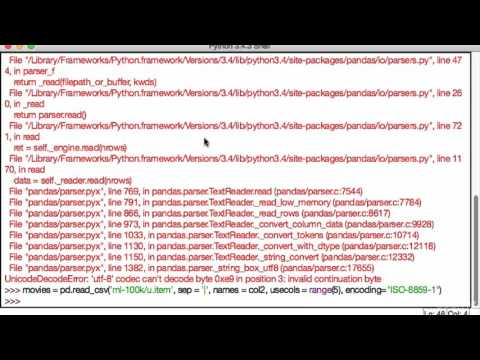

In [2]:
YouTubeVideo('dAjRNi6bhSE')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Deepan Sanghavi
    
    Dhaval Dholakia
    
    RohitSingh Pal
    
    Karan Napande
    
    Bhakti Chedda

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [3]:
import pandas as pd

#-------------------------------
# Problem 1 a)
import pandas as pd
import time

#For Movies
col1=['Movie_id','Title','Genre']
movies = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/movies.csv', header=0, names=col1)
movies.head()

#For Ratings
col2=['User_id','Movie_id','Rating','TimeStamp']
ratings = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/ratings.csv', header=0, names=col2)
ratings.head()

#For Users
col3=['User_id','Gender','Age','Occupation','Zipcode']
users = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/users.csv', header=0, names=col3)
users.head()

#Tried Zipcode also but not getting all zipcodes(got 70% of them). Used geocoders packacge

#data is merged
data = pd.merge(pd.merge(ratings,movies),users)

#TimeStamp Settings
data['TimeStamp'] = pd.to_datetime(Wholedata['TimeStamp'],unit='s',)
data.insert(4,"Year",data.TimeStamp.map(lambda x: x.year),allow_duplicates=True)
data.insert(4,"Month",data.TimeStamp.map(lambda x: x.month),allow_duplicates=True)


data.to_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv')
data

#-------------------------------




In [74]:
#How many movies have an average rating over 4.5 overall?

#Extract data from merged file
import pandas as pd
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre and get the mean
Groupmid=Wholedata.groupby(["Movie_id","Title","Genre"])["Rating"].mean()
Groupmid.head()

#Ratings above 4.5
df=pd.DataFrame(Groupmid)
df.reset_index(level=["Title","Genre"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Rating"]]
(Rating45)


,Title,Genre,Rating
Movie_id,,,
50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106
53,Lamerica (1994),Drama,4.750000
318,"Shawshank Redemption, The (1994)",Drama,4.554558
527,Schindler's List (1993),Drama|War,4.510417
745,"Close Shave, A (1995)",Animation|Comedy|Thriller,4.520548
787,"Gate of Heavenly Peace, The (1995)",Documentary,5.000000
858,"Godfather, The (1972)",Action|Crime|Drama,4.524966
989,Schlafes Bruder (Brother of Sleep) (1995),Drama,5.000000
1148,"Wrong Trousers, The (1993)",Animation|Comedy,4.507937


In [3]:
#How many movies have an average rating over 4.5 among men? How about women?
#Extract data from merged file
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre, Gender and get the mean
Groupmidgender=Wholedata.groupby(["Movie_id","Title","Genre","Gender"]).mean()
Groupmidgender.head()

#Ratings above 4.5 
df=pd.DataFrame(Groupmidgender)
df.reset_index(level=["Title","Genre","Gender"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Gender","Rating"]]#female who rated >= 4.5

#movies rated by Male > 4.5
Ratingmen45=Rating45[Rating45["Gender"]=='M']
print("Number of movies have an average rating over 4.5 among men: ",len(Ratingmen45))

#movies rated by Female > 4.5
Ratingwomen45=Rating45[Rating45["Gender"]=='F']
print("Number of movies have an average rating over 4.5 among women: ",len(Ratingwomen45))

('Number of movies have an average rating over 4.5 among men: ', 23)
('Number of movies have an average rating over 4.5 among women: ', 51)


In [7]:
#How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
#its over 35 because we cannot answer for 30. Age range = 25-35

#movies with 4.5 above rating
#Extract data from merged file
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre, Gender,Age and get the mean of rating
Groupmidgender=Wholedata.groupby(["Movie_id","Title","Genre","Gender","Age"])["Rating"].median()
Groupmidgender.head()

#Ratings median above 4.5 
df=pd.DataFrame(Groupmidgender)
df.reset_index(level=["Title","Genre","Gender","Age"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Gender","Age","Rating"]]#female who rated >= 4.5

#Male median ratings>4.5
Ratingmen45=Rating45[Rating45["Gender"]=='M']


#FeMale median ratings>4.5
Ratingwomen45=Rating45[Rating45["Gender"]=='F']

Ratingmen45=Ratingmen45.replace(["18-24","Under 18","25-34"],"Under 35")
Ratingmen45=Ratingmen45.replace(["35-44","45-49","50-55","56+"],"Over 35")

Ratingwomen45=Ratingwomen45.replace(["18-24","Under 18","25-34"],"Under 35")
Ratingwomen45=Ratingwomen45.replace(["35-44","45-49","50-55","56+"],"Over 35")

Answermen=Ratingmen45[Ratingmen45["Age"]=="Over 35"]

Answerwomen=Ratingmen45[Ratingmen45["Age"]=="Over 35"]

Answerwomen

#Final answer for men (Remove duplicate movies entry)
Answermen["Count"]=""
Answermenf=pd.DataFrame(Answermen.groupby(["Title","Genre"])["Count"].count())
print("Number of movies have an median rating over 4.5 among men over age 35: ",len(Answermenf))

#Final answer for women (Remove duplicate movies entry)
Answerwomen["Count"]=""
Answerwomenf=pd.DataFrame(Answerwomen.groupby(["Title","Genre"])["Count"].count())
print("Number of movies have an median rating over 4.5 among women over age 35: ",len(Answerwomenf))

('Number of movies have an median rating over 4.5 among men over age 35: ', 381)
('Number of movies have an median rating over 4.5 among women over age 35: ', 381)


C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#What are the ten most popular movies?

#Top movies based on views
import time
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()
moviecount=pd.DataFrame(Wholedata.groupby(["Movie_id","Title"]).size())
moviecount["Count"]=moviecount
del moviecount[0]
moviecount=moviecount.sort(columns=["Count"],ascending=False)
moviecount.head(10)

C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,,Count
Movie_id,Title,
2858,American Beauty (1999),3428
260,Star Wars: Episode IV - A New Hope (1977),2991
1196,Star Wars: Episode V - The Empire Strikes Back (1980),2990
1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
480,Jurassic Park (1993),2672
2028,Saving Private Ryan (1998),2653
589,Terminator 2: Judgment Day (1991),2649
2571,"Matrix, The (1999)",2590
1270,Back to the Future (1985),2583


In [18]:
#Make some conjectures about how easy various groups are to please? Support your answers with data!

#1- For which Genre does men and women tend to give high ratings(finding out Based on count of such high ratings)

#Extract data from merged file
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre, Gender and get the mean
Groupmidgender=Wholedata.groupby(["Movie_id","Title","Genre","Gender"]).mean()
Groupmidgender.head()

#Ratings above 4.5 
df=pd.DataFrame(Groupmidgender)
df.reset_index(level=["Title","Genre","Gender"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Gender","Rating"]]#female who rated >= 4.5

#movies rated by Male > 4.5
Ratingmen45=Rating45[Rating45["Gender"]=='M']
Ratingmen45

#movies rated by Female > 4.5
Ratingwomen45=Rating45[Rating45["Gender"]=='F']
len(Ratingwomen45)

#Count of genres with rating 4.5 and above (men)
df=pd.DataFrame(Ratingmen45.groupby("Genre").size())
df["Count(Men)"]=df
del df[0]
men45genre=df
men45genre

#Count of genres with rating 4.5 above (women)
df1=pd.DataFrame(Ratingwomen45.groupby("Genre").size())
df1["Count(Women)"]=df1
del df1[0]
women45genre=df1

#plot men vs women count for movies rating>4.5
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
men45genre.plot(kind='bar', color='red', ax=ax,width=0.4, position=1,fontsize=fontsize+2,title="Count of Genres for Men and Women > 4.5")
women45genre.plot(kind='bar', color='blue', ax=ax,width=0.4, position=0,fontsize=fontsize+2,title="Count of Genres for Men and Women > 4.5")
ax.set_ylabel("Number of Users",fontsize=fontsize+5)
ax.set_xlabel("GENRES",fontsize=fontsize+5)

plt.tight_layout()
plt.show()

In [14]:
#2 - Based on number of movies watched, agewise who is easy to please

##Age wise number of movies watched
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Genre","Title","Age"]).size())
df2["Count"]=df2
del df2[0]
agegenre=df2
agegenre.reset_index(level=["Title","Genre","Age"], inplace=True)
agegenre1=agegenre[agegenre["Age"]=='18-24']
agegenre2=agegenre[agegenre["Age"]=='25-34']
agegenre3=agegenre[agegenre["Age"]=='35-44']
agegenre4=agegenre[agegenre["Age"]=='45-49']
agegenre5=agegenre[agegenre["Age"]=='50-55']
agegenre6=agegenre[agegenre["Age"]=='56+']
agegenre7=agegenre[agegenre["Age"]=='Under 18']
agegenre1=agegenre1.sort(columns=["Count"],ascending=False)
agegenre2=agegenre2.sort(columns=["Count"],ascending=False)
agegenre3=agegenre3.sort(columns=["Count"],ascending=False)
agegenre4=agegenre4.sort(columns=["Count"],ascending=False)
agegenre5=agegenre5.sort(columns=["Count"],ascending=False)
agegenre6=agegenre6.sort(columns=["Count"],ascending=False)
agegenre7=agegenre7.sort(columns=["Count"],ascending=False)

#plot age wise number of movies watched
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
plt.bar((1,2,3,4,5,6,7),(sum(agegenre1["Count"]),sum(agegenre2["Count"]),sum(agegenre3["Count"]),sum(agegenre4["Count"]),sum(agegenre5["Count"]),sum(agegenre6["Count"]),sum(agegenre7["Count"])), alpha=0.4,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks((1.4,2.4,3.4,4.4,5.4,6.4,7.4),("18-24","25-34","35-44","45-49","50-55","56+","Under 18"))
plt.xlabel('Age Ranges',fontsize=15)
plt.ylabel('Number of Movies Rated',fontsize=15)
plt.title('Age wise Number of Movies Watched',fontsize=15)
plt.show()

##Age wise average rating given
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Age"])["Rating"].mean())
df2

C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:2

,Rating
Age,
18-24,3.507573
25-34,3.545235
35-44,3.618162
45-49,3.638062
50-55,3.714512
56+,3.766632
Under 18,3.549520


In [15]:
#3-Occupation wise who is easy to please

##Occupation wise number of movies watched
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Occupation"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort(columns=["Count"],ascending=False)

#plot occupation wise number of movies watched
import matplotlib.pyplot as plt
fontsize=10
ax=df2.plot(kind='bar',x=df2.index,y="Count",fontsize=fontsize+6,title="Occupation wise number of movies Rated")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Occupation",fontsize=fontsize+5)
plt.tight_layout()
plt.show()


C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [16]:
#3 continued

##Student monthwise count
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Occupation","Month"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort(columns=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Month"],inplace=True)
College=df2[df2["Occupation"]=="college/grad student"]
College=College

#plot College month
import matplotlib.pyplot as plt
fontsize=10
College=College.sort(columns=["Month"])
ax=College.plot(kind='bar',x=College.Month,y="Count",fontsize=fontsize+6)
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Month",fontsize=fontsize+5)
plt.title("Monthwise number of movies watched(College Student)",fontsize=20)
plt.tight_layout()
plt.show()

C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [19]:
#3 continued

#Student Genre Wise

##Student
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Occupation","Genre"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort(columns=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Genre"],inplace=True)
College=df2[df2["Occupation"]=="college/grad student"]
College=College.head(5)
College

#plot College genre
import matplotlib.pyplot as plt
fontsize=10
ax=College.plot(kind='bar',x=College.Genre,y="Count",fontsize=fontsize+6,title="Top 5 Genre Prefered by College Students")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Genre",fontsize=fontsize+5)
plt.tight_layout()
plt.show()

C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [29]:
#3 continued

#Gender wise Genre count
df1=pd.DataFrame(Wholedata.groupby(["Genre","Gender"]).size())
df1["Count"]=df1
del df1[0]
malefemalegenre=df1
malefemalegenre

#malefemale structured for plotting

df1.reset_index(level=["Genre","Gender"], inplace=True)
#df1.index=df1["Genre"]
malefemalegenre1=df1

#male and femal overall genre
malegenre=malefemalegenre1[malefemalegenre1["Gender"]=="M"]
malegenre=pd.DataFrame(malegenre.sort(columns=["Count"],ascending=False))
femalegenre=malefemalegenre1[malefemalegenre1["Gender"]=="F"]
femalegenre=pd.DataFrame(femalegenre.sort(columns=["Count"],ascending=False))

print(malegenre.head(5))
print(femalegenre.head(5))

               Genre Gender  Count
353           Comedy      M  87675
479            Drama      M  78571
371     Comedy|Drama      M  29937
415   Comedy|Romance      M  27112
185  Action|Thriller      M  21929
              Genre Gender  Count
478           Drama      F  32852
352          Comedy      F  29208
414  Comedy|Romance      F  15600
370    Comedy|Drama      F  12308
504   Drama|Romance      F  11749


C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [55]:
#-------------------------------
## Problem 2 : Expand our investigation to histograms

import pandas as pd
import matplotlib.pyplot as plt
data='C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv'
Wholedata = pd.read_csv(data ,encoding='unicode_escape',header=0)
Wholedata.head(3)
#-------------------------------

,Unnamed: 0,User_id,Movie_id,Rating,TimeStamp,Month,Year,Title,Genre,Gender,Age,Occupation,Zipcode
0,0,1,1193,5,2000-12-31 22:12:40,12,2000,One Flew Over the Cuckoo's Nest (1975),Drama,F,Under 18,K-12 student,48067
1,1,1,661,3,2000-12-31 22:35:09,12,2000,James and the Giant Peach (1996),Animation|Children's|Musical,F,Under 18,K-12 student,48067
2,2,1,914,3,2000-12-31 22:32:48,12,2000,My Fair Lady (1964),Musical|Romance,F,Under 18,K-12 student,48067


In [56]:
## Plot a histogram of the ratings of all movies

Rating=Wholedata["Rating"]
Rating.head(1)
plt.title("Ratings Histogram")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.hist(Rating,histtype='bar',rwidth=30,color='blue',label='Ratings of all Movies',bins=5)
plt.show()

In [57]:
## Plot a histogram of the number of ratings each movie recieved

Movie=Wholedata["Movie_id"]
df=Wholedata.groupby(by='Movie_id').count()
avgRating=Wholedata.groupby(by='Movie_id').mean()
df["Mean"]=avgRating["Rating"]

nRatings=df["Rating"]
avRating=df["Mean"]
plt.title("Number of Ratings")
plt.xlabel("No. of Rating")
plt.ylabel("Frequency")
plt.hist(nRatings,color='skyblue',bins=30)
plt.show()

In [58]:
## Plot a histogram of the average rating for each movie.

plt.title("Avg Rating")
plt.xlabel("Avg Rating")
plt.ylabel("Frequency")
plt.hist(avRating,color='lightgreen',bins=30,label='Avg Ratings and Movie')
plt.show()

In [59]:
## Plot a histogram of the average rating for movies which are rated more than 100 times.

highRated=df.loc[lambda df: df.Rating > 100, :]
avRating1=highRated["Mean"]
plt.title("Rated by more than 100 users")
plt.xlabel("Avg Rating")
plt.ylabel("Frequency")
res=plt.hist(avRating1,color='r',bins=30,label='Avg Ratings and Movie')
plt.axvline(avRating1.mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

In [60]:
highRated["Mean"].mean()

3.4016787545348444

In [61]:
## histogram of the average rating for movies which are rated less than 100 times.

lowRated=df.loc[lambda df: df.Rating <= 100, :]
avRating2=lowRated["Mean"]
plt.title("Rated by less than 101 users")
plt.xlabel("Avg Rating")
plt.ylabel("Frequency")
res=plt.hist(avRating2,color='r',bins=30,label='Avg Ratings and Movie')
plt.axvline(avRating2.mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

In [62]:
lowRated["Mean"].mean()

3.0468040174946243

In [63]:
## conjectures about the distribution of ratings :
## conjecture 1

Genre=Wholedata["Genre"]
G=Wholedata.groupby(by='Genre').count().reset_index()
rslt = G.sort_values(by="Rating", ascending=False)
#rslt.head(4)
topRatedGenre= rslt.iloc[0:5, :]
#topRatedGenre
genr=topRatedGenre["Genre"]
#genr
df2=pd.DataFrame(genr)
#df2
rating1=topRatedGenre["Rating"]
df3=pd.DataFrame(rating1)
df4=df2.join(df3)
df4


,Genre,Rating
176,Comedy,116883
239,Drama,111423
207,Comedy|Romance,42712
185,Comedy|Drama,42245
252,Drama|Romance,29170


In [64]:
ax=df4.plot(kind="bar",x="Genre",y="Rating")
ax.set_ylabel("Number of Ratings")
plt.tight_layout()
plt.show()

In [65]:
averageRatings=Wholedata.groupby(by='Genre').mean().reset_index()
averageRatings.head(2)
sortedAverageRatings=averageRatings.sort_values(by="Rating",ascending=False)
lowestAverageRatings=averageRatings.sort_values(by="Rating",ascending=True)
#sortedAverageRatings
genreDf=pd.DataFrame(sortedAverageRatings["Genre"])
ratingDf=pd.DataFrame(sortedAverageRatings["Rating"])
gvsrDf=genreDf.join(ratingDf)
gvsrDf=gvsrDf.head(5)
gvsrDf

,Genre,Rating
155,Animation|Comedy|Thriller,4.473837
297,Sci-Fi|War,4.449890
143,Animation,4.394336
268,Film-Noir|Mystery,4.367424
141,Adventure|War,4.346107


In [66]:
lowGenreDf=pd.DataFrame(lowestAverageRatings["Genre"])
lowRatingDf=pd.DataFrame(lowestAverageRatings["Rating"])
lowGvsR=lowGenreDf.join(lowRatingDf)
lowGvsR=lowGvsR.head(5)
lowGvsR

,Genre,Rating
5,Action|Adventure|Children's,1.318182
41,Action|Children's,1.742373
8,Action|Adventure|Children's|Sci-Fi,1.874286
195,Comedy|Film-Noir|Thriller,2.000000
7,Action|Adventure|Children's|Fantasy,2.090909


In [67]:
ax1=gvsrDf.plot(kind="bar",x="Genre",y="Rating",ylim=(0,5))
ax1.set_ylabel("Top Average Ratings")
plt.tight_layout()
plt.show()

In [68]:
ax2=lowGvsR.plot(kind="bar",x="Genre",y="Rating",ylim=(0,5))
ax2.set_ylabel("Low Average Ratings")
plt.tight_layout()
plt.show()

In [69]:
#Group by Movie ID, Title, Genre and get the mean
Groupmid=Wholedata.groupby(["Genre"])["Rating"].mean()
Groupmid.head()


Genre
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Name: Rating, dtype: float64

In [70]:

#Ratings above 3
df=pd.DataFrame(Groupmid)
df.reset_index(level=["Genre"], inplace=True)
Rating=df[df["Rating"]>3]
Rating45=Rating[["Genre","Rating"]]
Rating45



,Genre,Rating
0,Action,3.354886
1,Action|Adventure,3.676814
2,Action|Adventure|Animation,4.147826
4,Action|Adventure|Animation|Horror|Sci-Fi,3.546926
9,Action|Adventure|Comedy,3.095330
10,Action|Adventure|Comedy|Crime,3.137194
11,Action|Adventure|Comedy|Horror,3.826642
12,Action|Adventure|Comedy|Horror|Sci-Fi,3.804233
13,Action|Adventure|Comedy|Romance,3.862448
14,Action|Adventure|Comedy|Sci-Fi,3.739953


In [71]:

#include counts in the results
Wholedata["Count"]=""
x=pd.DataFrame(Wholedata.groupby(["Genre"])["Count"].count())
x.reset_index(level=["Genre"], inplace=True)
y=x.merge(Rating45)
y.sort(columns=["Count","Rating"],ascending=False)



C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Genre,Count,Rating
128,Comedy,116883,3.464456
186,Drama,111423,3.780611
155,Comedy|Romance,42712,3.530905
137,Comedy|Drama,42245,3.720559
199,Drama|Romance,29170,3.605417
66,Action|Thriller,26759,3.525917
221,Horror,22563,3.071932
207,Drama|Thriller,18248,3.782552
242,Thriller,17851,3.555879
23,Action|Adventure|Sci-Fi,17783,3.381375


In [72]:
## Conjecture 2:
## Age wise average rating given

df2=pd.DataFrame(Wholedata.groupby(["Age"])["Rating"].mean())
df2

,Rating
Age,
18-24,3.507573
25-34,3.545235
35-44,3.618162
45-49,3.638062
50-55,3.714512
56+,3.766632
Under 18,3.549520


In [73]:
# plot age wise sum of ratings watched

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
plt.bar((1,2,3,4,5,6,7),df2.Rating,alpha=0.4,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks((1.4,2.4,3.4,4.4,5.4,6.4,7.4),("18-24","25-34","35-44","45-49","50-55","56+","Under 18"))
plt.xlabel('Age Ranges',fontsize=15)
plt.ylabel('Sum of Ratings',fontsize=15)
plt.title('Age wise Sum of Rating',fontsize=15)
plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [30]:
#-------------------------------
#Wuestion a.

#Question 3 a. (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
data.head()

mean_ratings = data.pivot_table(values='Rating', index='Title',columns='Gender', aggfunc='mean')
mean_ratings

plt.scatter(mean_ratings["F"],mean_ratings["M"],c=["red","blue"])
plt.title("Men Vs Women Mean Rating for each movie",fontsize=15)
plt.show()
#-------------------------------



In [31]:
#Question 3 b.* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.

#q 3 b.

data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
data.head()

mean_ratings = data.pivot_table(values='Rating', index='Title',columns='Gender', aggfunc='mean')
mean_ratings
ratings_by_title = data.groupby(['Title']).size()
ratings_by_title

active_titles = ratings_by_title.index[ratings_by_title >= 200]
active_titles
mean_ratings = mean_ratings.ix[active_titles]

mean_ratings.reset_index(level=["Title"],inplace=True)
mean_ratings
mean_ratings.columns.name="Index"

plt.scatter(mean_ratings["F"],mean_ratings["M"],c=["red","blue"])
plt.title("Men Vs Women Mean Rating for each movie(>200)",fontsize=15)
plt.show()



In [ ]:
#3 c.* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
 #   * What do you observe?


import numpy as np
print(np.corrcoef(mean_ratings["F"],mean_ratings["M"],rowvar=0))

In [32]:
#  * Are the ratings similiar or not? Support your answer with data!

#Overall average ratings m f
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre, Gender and get the mean
Groupmidgender=Wholedata.groupby(["Gender"])["Rating"].mean()
Groupmidgender.head()

Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

In [33]:
#Continued

#Overall size m f
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre, Gender and get the mean
Groupmidgender=Wholedata.groupby(["Gender"]).size()
Groupmidgender.head()

Gender
F    246440
M    753769
dtype: int64

In [39]:
#Continued

#Genre wise overall rating M F

#Extract data from merged file
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()



mean_ratings = data.pivot_table(values='Rating', index=['Genre'],columns='Gender', aggfunc='mean')
mean_ratings["Difference"]=(mean_ratings["F"]-mean_ratings["M"])
mean_ratingsasc=mean_ratings.sort(columns=["F","M"],ascending=False)
mean_ratingsdes=mean_ratings.sort(columns=["Difference"],ascending=False)
mean_ratingsasc.head(5)


C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Gender,F,M,Difference
Genre,,,
Animation|Comedy|Thriller,4.550802,4.445110,0.105692
Animation,4.533333,4.353107,0.180226
Film-Noir|Romance|Thriller,4.448718,4.211073,0.237645
Sci-Fi|War,4.376623,4.464789,-0.088165
Adventure|Children's|Drama|Musical,4.355030,4.203138,0.151892


In [40]:
mean_ratingsdes.head(5)

Gender,F,M,Difference
Genre,,,
Children's|Drama|Fantasy,3.538462,2.756410,0.782051
Action|Comedy|Romance|Thriller,3.254717,2.578358,0.676359
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638,0.635703
Children's|Musical,3.859504,3.286325,0.573179
Children's|Fantasy,3.090909,2.562500,0.528409


In [ ]:
#* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.

#1- Month wise average rating for men and women:

#Month
data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
data.head()

mean_ratings = data.pivot_table(values='Rating', index=['Month'],columns='Gender', aggfunc='mean')
mean_ratings
#plot men vs wpmen count for movies rating>4.5
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
mean_ratings.plot(kind='bar', color=['red','blue'], ax=ax,width=0.4, position=1,rot=60,fontsize=fontsize+2,title="Average Rating of Men and Women (monthwise)")
ax.set_ylabel("Mean rating",fontsize=fontsize+5)
ax.set_xlabel("Month",fontsize=fontsize+5)

plt.tight_layout()
plt.show()

In [41]:
#Continued Conjecture

#Monthwisse number of movies rated
data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
data.head()
mean_ratings = data.pivot_table( index=['Month'],columns='Gender', aggfunc='size')

mean_ratings["Difference"]=abs((mean_ratings["F"]-mean_ratings["M"]))
del mean_ratings["F"]
del mean_ratings["M"]
mean_ratings
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
mean_ratings.plot(kind='bar', color=['red','blue'], ax=ax,width=0.4, position=1,rot=60,fontsize=fontsize+2,title="Diffence in number of movies rated by Men and Women (monthwise)")
ax.set_ylabel("Number of Ratings",fontsize=fontsize+5)
ax.set_xlabel("Month",fontsize=fontsize+5)

plt.tight_layout()
plt.show()



In [43]:
#2-Average Rating group by Genre and Age:

#Genre age
data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
data.head()

mean_ratings = data.pivot_table(values='Rating', index=['Genre','Age'],columns='Gender', aggfunc='mean')
mean_ratings["Difference"]=(mean_ratings["F"]-mean_ratings["M"])
mean_ratings
asc=mean_ratings.sort(columns=["Difference"],ascending=False)
dsc=mean_ratings.sort(columns=["Difference"])
zero=mean_ratings[mean_ratings["Difference"]==0]
asc.head(5)


C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Gender,F,M,Difference
Genre,Age,,,
Comedy|Horror|Sci-Fi,50-55,5.00,1.500000,3.500000
Romance|Western,18-24,5.00,1.666667,3.333333
Adventure|Musical|Romance,18-24,4.25,1.000000,3.250000
Children's|Fantasy,35-44,4.00,1.000000,3.000000
Documentary|War,56+,5.00,2.000000,3.000000


In [44]:
dsc.head()

,Gender,F,M,Difference
Genre,Age,,,
Horror|Mystery,Under 18,1.0,5.000000,-4.000000
Action|Adventure|Comedy|Horror,Under 18,1.0,4.214286,-3.214286
Romance|Western,25-34,1.0,4.000000,-3.000000
Drama|Musical|War,50-55,1.0,4.000000,-3.000000
Action|Comedy|War,Under 18,1.0,3.812500,-2.812500


In [45]:
zero.head()

,Gender,F,M,Difference
Genre,Age,,,
Action|Adventure|Romance|War,Under 18,4.333333,4.333333,0.0
Action|Adventure|Western,Under 18,3.000000,3.000000,0.0
Action|Comedy|Musical|Sci-Fi,56+,2.500000,2.500000,0.0
Action|Drama|Mystery|Romance|Thriller,56+,4.000000,4.000000,0.0
Action|Western,Under 18,4.000000,4.000000,0.0


In [46]:
zero.reset_index(level=["Age"],inplace=True)
zero[zero["Age"]=="Under 18"]

Gender,Age,F,M,Difference
Genre,,,,
Action|Adventure|Romance|War,Under 18,4.333333,4.333333,0.0
Action|Adventure|Western,Under 18,3.000000,3.000000,0.0
Action|Western,Under 18,4.000000,4.000000,0.0
Adventure|Drama|Romance,Under 18,4.000000,4.000000,0.0
Documentary|Drama,Under 18,4.000000,4.000000,0.0
Documentary|Musical,Under 18,3.500000,3.500000,0.0


In [47]:
#3-Occupation wise Average Rating Trend of Male and Female:
#gender occupation
data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieDataFinal.csv', header=0)
data.head()

mean_ratings = data.pivot_table(values='Rating', index=['Occupation'],columns='Gender', aggfunc='mean')
mean_ratings["Difference"]=(mean_ratings["F"]-mean_ratings["M"])
mean_ratings


Gender,F,M,Difference
Occupation,,,
K-12 student,3.572390,3.515668,0.056722
academic/educator,3.584606,3.571737,0.012869
artist,3.555888,3.581192,-0.025304
clerical/admin,3.687679,3.630709,0.056970
college/grad student,3.547252,3.533348,0.013905
customer service,3.584891,3.527222,0.057669
doctor/health care,3.690834,3.641861,0.048973
executive/managerial,3.668559,3.585641,0.082918
farmer,3.363208,3.498551,-0.135343


*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [75]:
#Overall favourite Movies
#Extract data from merged file
import pandas as pd
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre and get the mean
Groupmid=Wholedata.groupby(["Movie_id","Title","Genre"])["Rating"].mean()
Groupmid.head()

#Ratings above 4.5
df=pd.DataFrame(Groupmid)
df.reset_index(level=["Title","Genre"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Rating"]]
Rating45


#include counts in the results
Wholedata["Count"]=""
x=pd.DataFrame(Wholedata.groupby(["Movie_id","Title","Genre"])["Count"].count())
x.reset_index(level=["Title","Genre"], inplace=True)
y=x.merge(Rating45)
y.sort(columns=["Count","Rating"],ascending=False).head(5)


C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Title,Genre,Count,Rating
3,Schindler's List (1993),Drama|War,2304,4.510417
2,"Shawshank Redemption, The (1994)",Drama,2227,4.554558
6,"Godfather, The (1972)",Action|Crime|Drama,2223,4.524966
0,"Usual Suspects, The (1995)",Crime|Thriller,1783,4.517106
8,"Wrong Trousers, The (1993)",Animation|Comedy,882,4.507937


In [ ]:
#Analysis For Business Question
#Many detailed stuffed is done in Conjectures

data = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
data.head()
df = data.pivot_table(values='Rating', index=['Genre'],columns='Occupation', aggfunc='mean')
df=df.sort(columns=["college/grad student"],ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(df.head(15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Genres",fontsize=15)

for x in ax.get_xticklabels():
    x.set_rotation(90)
for x in ax.get_yticklabels():
    x.set_rotation(0)
plt.tight_layout()
plt.show()

C:\Users\Deepan Sanghavi\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [49]:
Wholedata = pd.read_csv('C:/Users/Deepan Sanghavi/501/Case Study 2/Karan/MovieData1.csv', header=0)
Wholedata.head()
df = data.pivot_table(values='Rating', index=['Occupation'],columns='Gender', aggfunc='sum')
df

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
df.plot(kind='bar',stacked=True, color=['red','blue'], ax=ax,width=0.4, position=1,fontsize=fontsize+2,title="Sum of Ratings for each occuaption(Gender Based)")
ax.set_ylabel("Sum Of Rating",fontsize=fontsize+5)
ax.set_xlabel("Occuaption",fontsize=fontsize+5)

plt.tight_layout()
plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 2-TEAM NUMBER ???".